# Librerias

In [1]:
#Importemos las librerias Necesarias:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
import sklearn as skl

***

## ***1)* Carga el dataset Indian-Liver-Patient.**

In [3]:
# pd.read_csv?

In [4]:
# Carguemos los datos del csv
cols = ['age', 'gen', 'tbili', 'dbili', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'ag' ,'class']
df = pd.read_csv('Indian_Liver_Patients.csv', sep=',', names=cols)
df

,age,gen,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## ***2)* Identifica numérica o gráficamente aquellas variables que son susceptibles de aplicar una transformación.**

In [5]:
# comprobemos la infromacion dle data frame
print(f'Descripcion de los tipos de variable de cada atributo:\n{df.dtypes}\n')
print(f'Analisi de todos los atributos:\n{df.describe()}')

Descripcion de los tipos de variable de cada atributo:
age          int64
gen         object
tbili      float64
dbili      float64
alkphos      int64
sgpt         int64
sgot         int64
tp         float64
alb        float64
ag         float64
class        int64
dtype: object

Analisi de todos los atributos:
              age       tbili       dbili      alkphos         sgpt  \
count  583.000000  583.000000  583.000000   583.000000   583.000000   
mean    44.746141    3.298799    1.486106   290.576329    80.713551   
std     16.189833    6.209522    2.808498   242.937989   182.620356   
min      4.000000    0.400000    0.100000    63.000000    10.000000   
25%     33.000000    0.800000    0.200000   175.500000    23.000000   
50%     45.000000    1.000000    0.300000   208.000000    35.000000   
75%     58.000000    2.600000    1.300000   298.000000    60.500000   
max     90.000000   75.000000   19.700000  2110.000000  2000.000000   

              sgot          tp         alb       

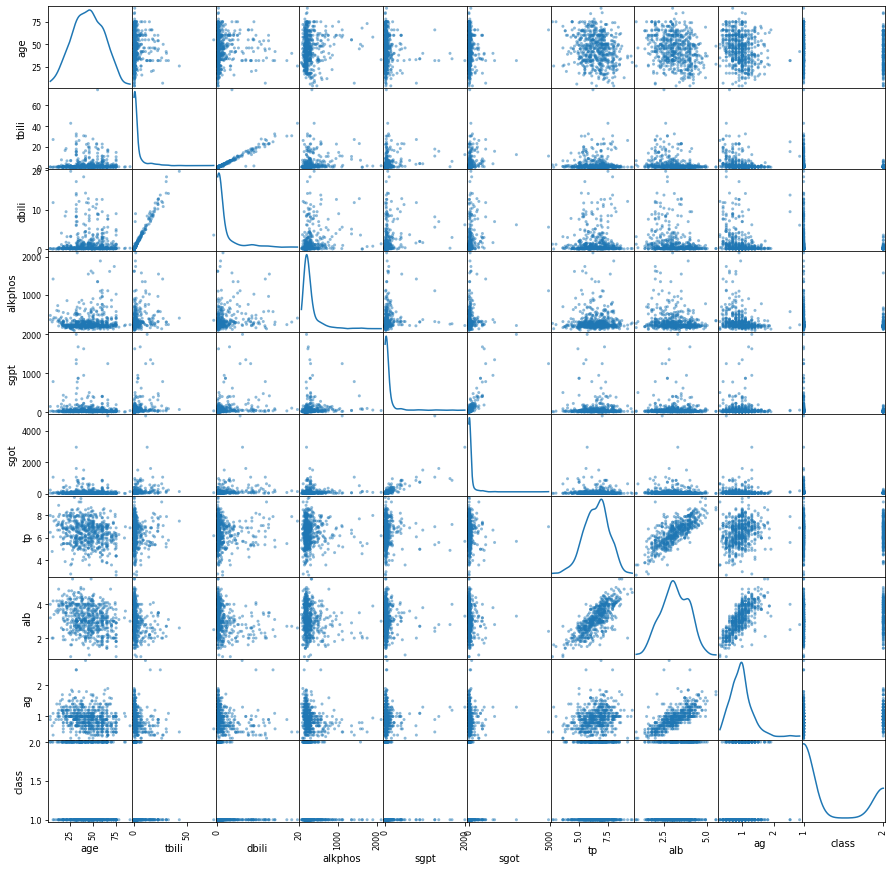

In [6]:
matrix = pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(15, 15), diagonal='kde')

Como se puede apreciar en la diagonal de la matriz de dispersión salvo las columnas tbili, dbili, sgpt y sgot todas se encuentran desplazadas por lo que son susceptibles de aplicarles una transformación. Además, hay gráficas cuyos rangos son bastante más amplios que las demás por lo que sería recomendable normalizar los datos.

## ***3)* Elige una variable numérica y aplica uno a uno todos los métodos de escalado de variables que de datos que se han visto en la lección.<br/>**
## ***4)* Compara gráficamente mediante un gráfico de densidad los efectos producidos en la variable.**

Para este apartado emplearemos el atributo 'tbili'


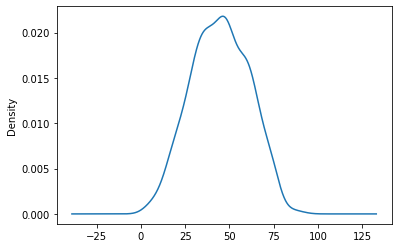

In [7]:
# ants de nada imprimamos el atributo:
plot = df.drop(['class', 'gen'], axis=1)['age'].plot(kind='kde')

***MinMaxScaller***

In [8]:
# Importamos la libreria:
from sklearn.preprocessing import MinMaxScaler as MMS

# Adecuemos el DF
mmSc_df = df.drop(['class', 'gen'], axis=1)
mmSc_cols = cols = ['age', 'tbili', 'dbili', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'ag']

# Creamos el objeto y transformamos los datos:
mmSc = MMS(feature_range=(0, 1), copy=False)
mmSc.fit(mmSc_df)
mmSc_df = mmSc.transform(mmSc_df)

# Adecuamos los datos 
mmSc_df = pd.DataFrame(mmSc_df, columns=mmSc_cols)
mmSc_df.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040


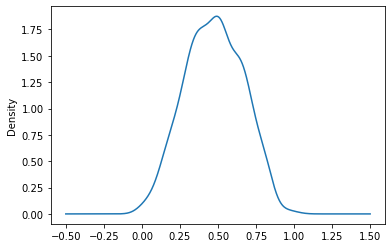

In [9]:
mm = mmSc_df['age'].plot(kind='kde')

El operador MinMaxScaler realiza un escalado de manera que todos los atributos estén escaladas bajo la misma escala.


***SatndardScaller***


In [10]:
# Importamos la libreria:
from sklearn.preprocessing import StandardScaler as STD

# Adecuemos el DF
stdSc_df = df.drop(['class', 'gen'], axis=1)
stdSc_cols = cols = ['age', 'tbili', 'dbili', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'ag']

# Creamos el objeto y transformamos los datos:
stdSc = STD()
stdSc.fit(stdSc_df)
stdSc_df = stdSc.transform(stdSc_df)

# Adecuamos los datos 
stdSc_df = pd.DataFrame(stdSc_df, columns=stdSc_cols)
stdSc_df.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237


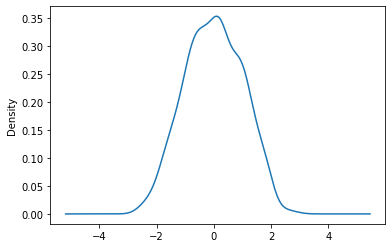

In [11]:
std = stdSc_df['age'].plot(kind='kde')

A diferencia de en MinMaxScaler, con Standard Scaler si se realiza una traslacion de los resultados ya que estos se ven centrados en el 0 sin embargo en estos casos, los valores atipicos seran un problema a tener en cuenta.

In [12]:
# Importamos la libreria:
from sklearn.preprocessing import RobustScaler as RBST

# Adecuemos el DF
rbstSc_df = df.drop(['class', 'gen'], axis=1)
rbstSc_cols = cols = ['age', 'tbili', 'dbili', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'ag']

# Creamos el objeto y transformamos los datos:
rbstSc = RBST()
rbstSc.fit(rbstSc_df)
rbstSc_df = rbstSc.transform(rbstSc_df)

# Adecuamos los datos 
rbstSc_df = pd.DataFrame(rbstSc_df, columns=rbstSc_cols)
rbstSc_df.head()

,age,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag
0,0.80,-0.166667,-0.181818,-0.171429,-0.506667,-0.387097,0.142857,0.166667,-0.075
1,0.68,5.500000,4.727273,4.008163,0.773333,0.935484,0.642857,0.083333,-0.475
2,0.68,3.500000,3.454545,2.302041,0.666667,0.419355,0.285714,0.166667,-0.100
3,0.52,0.000000,0.090909,-0.212245,-0.560000,-0.354839,0.142857,0.250000,0.175
4,1.08,1.611111,1.545455,-0.106122,-0.213333,0.274194,0.500000,-0.583333,-1.325


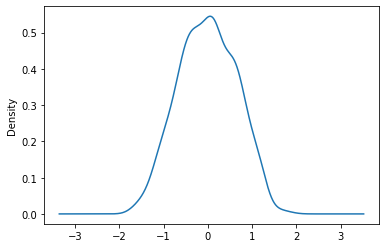

In [13]:
rbst = rbstSc_df['age'].plot(kind='kde')

Al igual que el standard scaler, el min max scaler centrará los atributos que no lo estén y escalará los tributos pero, a diferencia del standard scaler, el robust scaler empleará estadisticos que no representen un problema a la hora de escalar atributos con outliers.

***

# Notas:

> Nota 1

# Bibliografia:

   * Manual de la leccion.